# 起動・ライブラリの準備

## ライブラリのインポート

In [10]:
# 配列計算ライブラリ NumPy
import numpy as np

# 画像表示用関数
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

# tf.Kerasのディープラーニング用クラス
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import utils

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

# tf.Kerasに入っているMnistデータ
from tensorflow.keras.datasets import mnist

# データの準備・加工

## データセットの読み込み

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 学習用画像を1枚表示

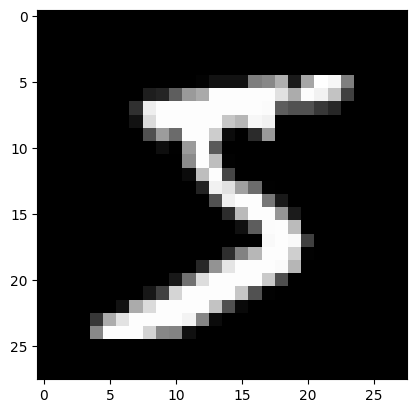

In [12]:
imshow(X_train[0], "gray")

## 学習用正解ラベルを1つ表示

In [13]:
print(y_train[0])

5


## 変数の構造を確認

In [14]:
print(X_train.shape)

(60000, 28, 28)


## 画像の実際の内容を確認

In [15]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## 前処理１：画像を一次元の配列に変形

In [16]:
# x_train = X_train.reshape(60000, 784)
# x_test = X_test.reshape(10000, 784)
# print(x_train[0])

## 前処理２：画素の正規化

In [17]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

x_train /= 255
x_test /= 255

## 前処理３：正解ラベルのOne-Hotエンコーディング

In [18]:
#★現在のラベルを表示
print(y_train)

[5 0 4 ... 5 6 8]


In [19]:
#★One-Hotエンコーディング
y_train_label = utils.to_categorical(y_train)
y_test_label = utils.to_categorical(y_test)

In [20]:
#★結果を表示
print(y_train_label)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# 学習方法の決定

## ニューラルネットワークモデルを構築

In [21]:
def build_multilayer_perceptron():
    model = Sequential()

    #Conv2D(フィルタ数, ストライド, 入力のサイズ)
    model.add(Conv2D(32, 3, input_shape=(28, 28, 1)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(64, 3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(128, 3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Dropout(0.5))

    model.add(Flatten())
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [22]:
#★上の関数でモデルを構築
model = build_multilayer_perceptron()

## モデルの構造を確認

In [23]:
#★
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

## モデルのコンパイル

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# 学習

## 学習の実行

In [25]:
history = model.fit(X_train, y_train_label,
                   batch_size=128,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, y_test_label))

Epoch 1/20
469/469 [==============================] - 43s 89ms/step - loss: 1.0220 - accuracy: 0.7585 - val_loss: 0.1352 - val_accuracy: 0.9595
Epoch 2/20
469/469 [==============================] - 40s 86ms/step - loss: 0.2563 - accuracy: 0.9240 - val_loss: 0.1001 - val_accuracy: 0.9707
Epoch 3/20
469/469 [==============================] - 40s 85ms/step - loss: 0.1796 - accuracy: 0.9477 - val_loss: 0.0883 - val_accuracy: 0.9758
Epoch 4/20
469/469 [==============================] - 37s 79ms/step - loss: 0.1393 - accuracy: 0.9590 - val_loss: 0.0673 - val_accuracy: 0.9797
Epoch 5/20
469/469 [==============================] - 37s 79ms/step - loss: 0.1159 - accuracy: 0.9654 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 6/20
469/469 [==============================] - 37s 79ms/step - loss: 0.1047 - accuracy: 0.9693 - val_loss: 0.0756 - val_accuracy: 0.9802
Epoch 7/20
469/469 [==============================] - 37s 79ms/step - loss: 0.0970 - accuracy: 0.9719 - val_loss: 0.0667 - val_accuracy:

# 予測・評価

## 精度の評価

In [33]:
#★
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 3s 8ms/step - loss: 0.0521 - accuracy: 0.9876


In [35]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05207213759422302
Test accuracy: 0.9876000285148621


## 実際の予測

In [36]:
#★
predicts = model.predict(X_test).argmax(axis=-1)

313/313 [==============================] - 2s 6ms/step


predit label is 7
label is 7


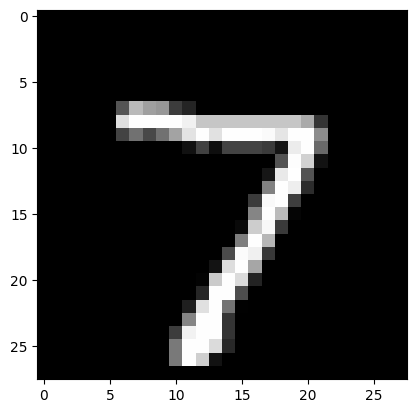

In [37]:
#★ X_test, y_test, predictsの最初の要素[0]を表示
print(f"predit label is {predicts[0]}")
print(f"label is {y_test[0]}")
imshow(X_test[0], "gray")

## 不正解を取得

In [38]:
wrongs = []
for i, (y,predict) in enumerate(zip(y_test,predicts)):
    if y != predict:
        wrongs.append((i,(y, predict)))
wrongs 

[(43, (2, 4)),
 (115, (4, 9)),
 (247, (4, 6)),
 (321, (2, 7)),
 (359, (9, 8)),
 (449, (3, 5)),
 (543, (8, 7)),
 (582, (8, 2)),
 (646, (2, 1)),
 (659, (2, 1)),
 (726, (7, 0)),
 (883, (3, 2)),
 (938, (3, 5)),
 (947, (8, 9)),
 (1014, (6, 5)),
 (1232, (9, 4)),
 (1260, (7, 1)),
 (1299, (5, 7)),
 (1494, (7, 0)),
 (1522, (7, 8)),
 (1527, (1, 5)),
 (1621, (0, 6)),
 (1681, (3, 7)),
 (1790, (2, 7)),
 (1901, (9, 4)),
 (1940, (5, 0)),
 (2024, (7, 9)),
 (2035, (5, 3)),
 (2044, (2, 7)),
 (2053, (4, 9)),
 (2129, (9, 8)),
 (2130, (4, 9)),
 (2135, (6, 1)),
 (2182, (1, 2)),
 (2293, (9, 0)),
 (2299, (2, 7)),
 (2329, (0, 2)),
 (2405, (3, 2)),
 (2414, (9, 4)),
 (2447, (4, 9)),
 (2462, (2, 8)),
 (2488, (2, 7)),
 (2496, (2, 3)),
 (2578, (7, 2)),
 (2582, (9, 7)),
 (2597, (5, 3)),
 (2654, (6, 1)),
 (2742, (9, 0)),
 (2836, (4, 7)),
 (2896, (8, 0)),
 (2927, (3, 2)),
 (2930, (5, 6)),
 (2953, (3, 5)),
 (2995, (6, 8)),
 (3004, (2, 8)),
 (3060, (9, 7)),
 (3108, (3, 5)),
 (3369, (9, 1)),
 (3520, (6, 4)),
 (3762, (6, 

## 不正解画像を表示

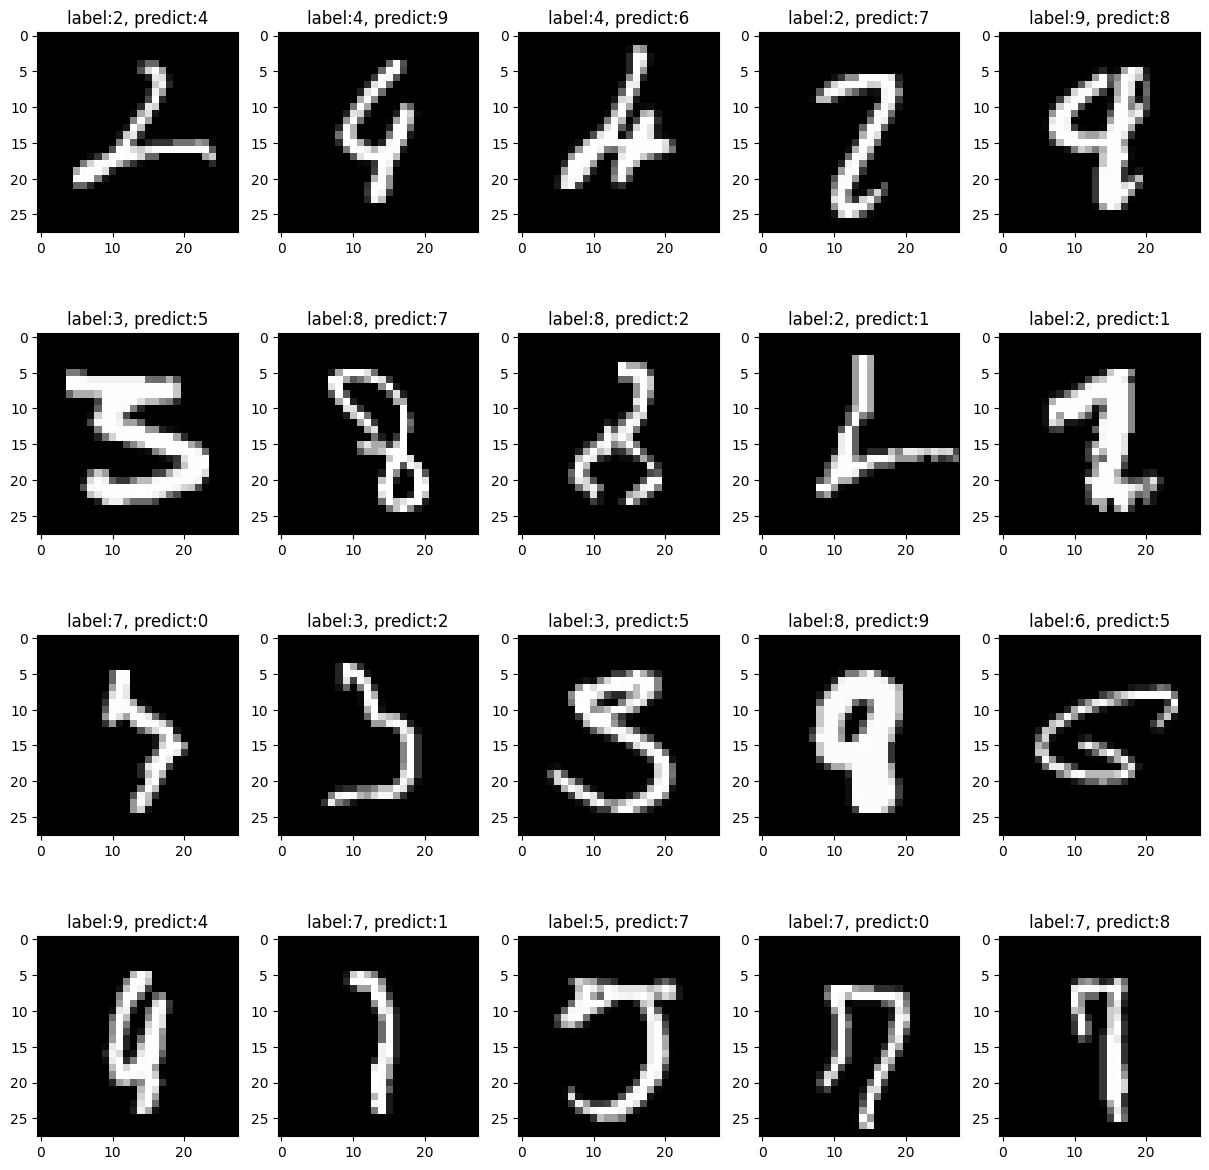

In [39]:
f = plt.figure(figsize=(15,15))
for i ,(index, (label, predict)) in enumerate(wrongs[:20]):
    i += 1
    axes = f.add_subplot(4,5,i)
    axes.set_title(f"label:{label}, predict:{predict}")
    axes.imshow(X_test[index], "gray")

## モデルの保存

In [41]:
model.save("model_cnn.keras")